# **9장 합성곱 신경망**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 머신러닝 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **LAB 9-1 합성곱을 구현해 보자**

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.utils import get_file   # URL로 파일 읽기 위해

8074/8074 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
837658/837658 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


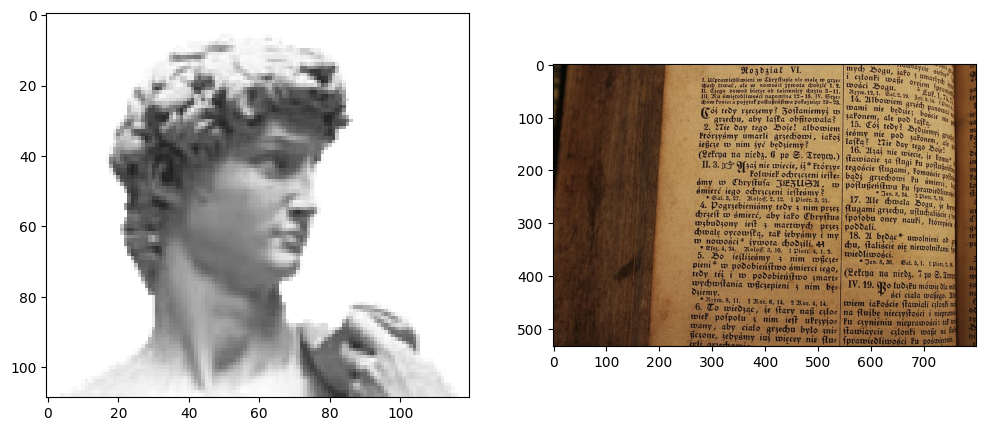

In [3]:
# URL 이미지를 로컬에 캐싱하고 바로 mpimg.imread로 읽기
def url_imread(url):
    cached_file = get_file(origin=url)
    return mpimg.imread(cached_file)

location = 'https://github.com/dknife/ML2nd/raw/main/data/image/'
img1 = url_imread(location + 'david.png')
img2 = url_imread(location + 'book.png')

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1); plt.imshow(img1);
plt.subplot(1,2,2); plt.imshow(img2);
plt.show()

In [4]:
img1.shape, img2.shape

((109, 120, 4), (533, 800, 3))

In [6]:
def padding(image, p_size):    # 넘파이의 pad 함수를 이용한 패딩 구현
   padded_img = np.pad(
                  array = image,
                  pad_width = ((p_size,p_size), (p_size,p_size), (0,0)),
                  mode = 'constant', constant_values = 0)
   return padded_img

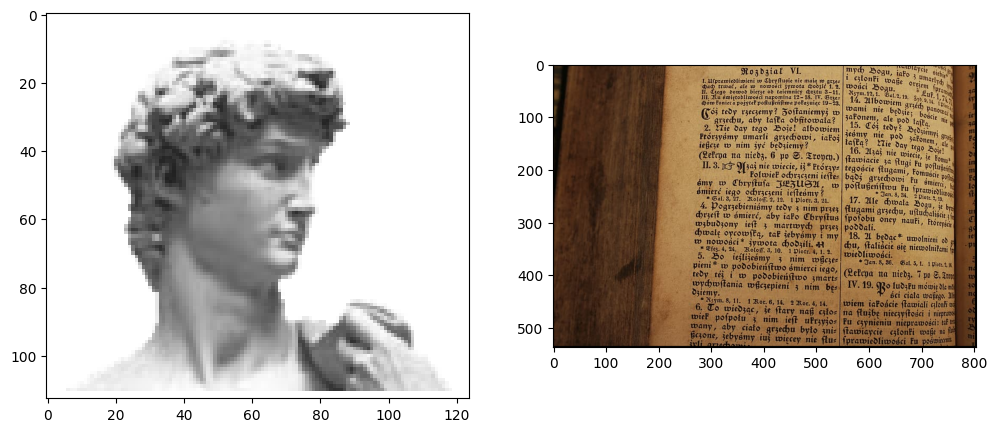

((113, 124, 4), (537, 804, 3))

In [17]:
padded1, padded2 = padding(img1, 2), padding(img2, 2)
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1); plt.imshow(padded1);
plt.subplot(1,2,2); plt.imshow(padded2);
plt.show()
padded1.shape, padded2.shape

In [18]:
box_filter = np.array(
   [[1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]])

In [19]:
def apply_filter(small_region, filter) :
    conv = np.multiply(small_region, filter)
    return np.sum(conv)

In [20]:
def convolution(img, filter):
   r, c, channels = img.shape
   rp, cp = filter.shape
   th_r, th_c = (rp-1)//2 , (cp-1)//2

   start = np.array([ th_r, th_c ])
   end = np.array([r, c]) - start
   print(start, end, rp, cp)
   conv_img = np.zeros( (r - th_r*2, c - th_c*2, channels) )

   for channel in range(channels):
       for i in range(start[0], end[0]):
           for j in range(start[1], end[1]):
               conv_img[i-th_r, j-th_c, channel] = apply_filter(
                       img[i-th_r:i+th_r+1, j-th_c:j+th_c+1, channel],
                       filter)
   return conv_img

[1 1] [112 123] 3 3
[1 1] [536 803] 3 3


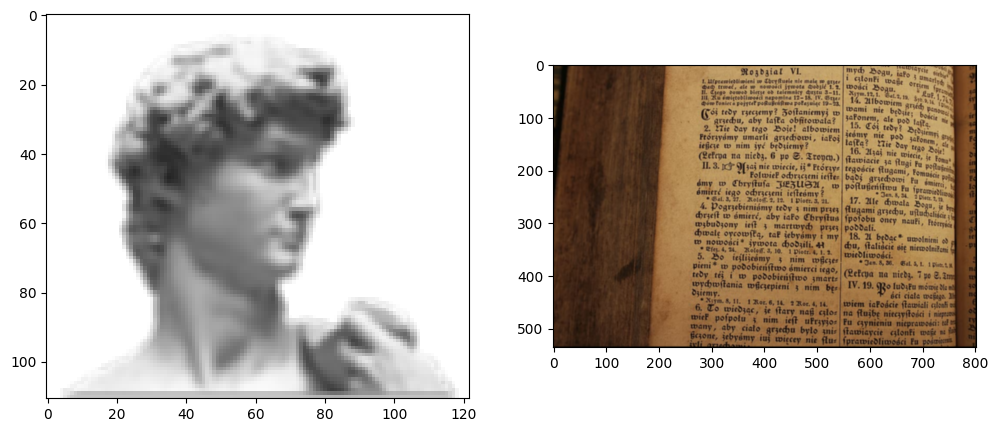

((111, 122, 4), (535, 802, 3))

In [28]:
conv_img1 = convolution(padded1, box_filter)
conv_img2 = convolution(padded2, box_filter)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1); plt.imshow(conv_img1);
plt.subplot(1,2,2); plt.imshow(conv_img2);
plt.show()

conv_img1.shape, conv_img2.shape

[1 1] [112 123] 3 3
[1 1] [536 803] 3 3


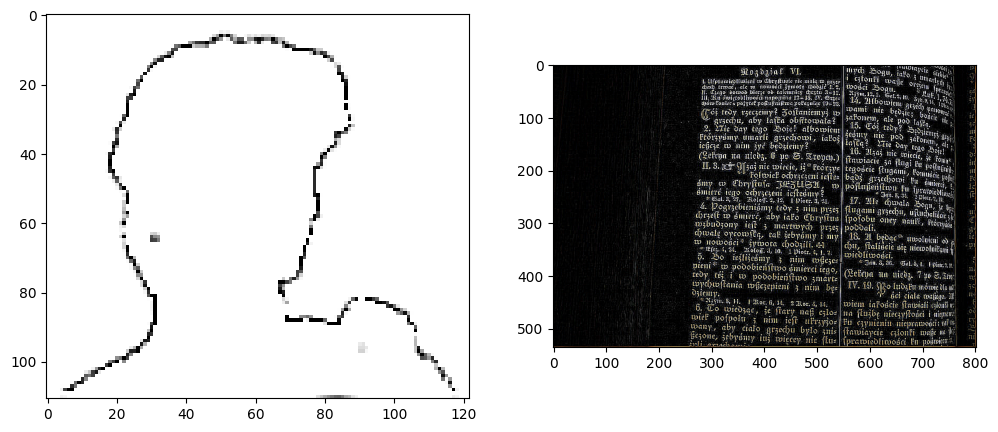

In [29]:
laplacian = np.array(
   [[1, 0, 1],
    [0, -4, 0],
    [1, 0, 1],    ])

conv_img1 = convolution(padded1, laplacian)
conv_img2 = convolution(padded2, laplacian)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1); plt.imshow(conv_img1);
plt.subplot(1,2,2); plt.imshow(conv_img2);
plt.show()


[1 1] [112 123] 3 3
[1 1] [536 803] 3 3


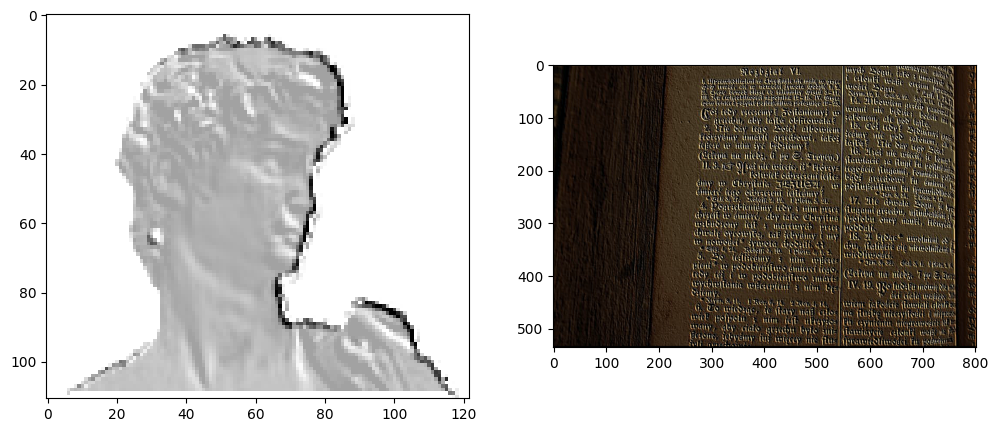

In [45]:
unknown = np.random.randn(3, 3)*np.random.rand()

conv_img1 = convolution(padded1, unknown)
conv_img2 = convolution(padded2, unknown)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1); plt.imshow(conv_img1);
plt.subplot(1,2,2); plt.imshow(conv_img2);
plt.show()